In [ ]:
#NN
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
# get the data
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/CAIS++/F23_Curriculum/MP
!ls

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

data = pd.read_csv('water_potability.csv')
data

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/CAIS++/F23_Curriculum/MP
pipeline.pkl  water_potability.csv


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# data cleaning
data['ph'] = data['ph'].fillna(data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())

# see the data
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
# Assuming 'df' is your Pandas DataFrame
df = data.drop(columns=['Potability']).values  # Extract features
labels = data['Potability'].values  # Extract labels

# Convert to PyTorch tensors
data_tensor = torch.tensor(df, dtype=torch.float64)
labels_tensor = torch.tensor(labels, dtype=torch.int64)  # Assuming labels are integers


In [ ]:
from pickle import TRUE
from sklearn.model_selection import train_test_split
# Convert PyTorch tensors to NumPy arrays
data_array = data_tensor.numpy()
labels_array = labels_tensor.numpy()

# Set a random seed for reproducibility (optional)
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(data_array, labels_array, test_size = 0.2, random_state = 42, shuffle = True)
# convert them back into tensors
x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create PyTorch TensorDatasets for your training and testing data
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

# Create data loaders for training and testing
train_loader = DataLoader(dataset = train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset = test_dataset, batch_size=64, shuffle=False)

print("Number of training examples:", len(train_dataset))
print("Number of testing examples:", len(test_dataset))

examples = iter(train_loader)
samples, labels = next(examples)
print("Sample shape: ", samples.shape)
print("Label shape: ", labels.shape)

print("Sample datatype: ", samples.dtype)
print("Labels datatype: ", labels.dtype)

print("Labels: ", labels)

Number of training examples: 2620
Number of testing examples: 656
Sample shape:  torch.Size([64, 9])
Label shape:  torch.Size([64])
Sample datatype:  torch.float64
Labels datatype:  torch.int64
Labels:  tensor([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])


In [ ]:
batch_size = 2**4

In [ ]:
# Parameters
input_size = 9
num_classes = 2
num_epochs = 20

class NN(nn.Module):

  # 1. Initialize our own NN model
  def __init__(self, input_size, num_classes):
    super(NN, self).__init__()
    # Use ReLU activation function
    self.relu = nn.ReLU()
    # Input layer
    self.input_layer = nn.Linear(input_size, 128)
    # Hidden layers: use at least 1 hidden layer!
    self.hidden1 = nn.Linear(128, 64)
    # Output layer
    self.output_layer = nn.Linear(64, num_classes)

  # 2. Define method for forwarding input data
  def forward(self, sample):

    out = self.input_layer(sample)
    #pass input into input layer
    out = self.relu(out)
    #activation function

    out = self.hidden1(out)
    #pass into all hidden layer(s)
    out = self.relu(out)
    #activation function

    out = self.output_layer(out)
    #forward to output layer
    return out

# Initialize our model by passing in our hyperparameters defined previously
nn_model = NN(input_size, num_classes)
print("My NN Model: ", nn_model)

My NN Model:  NN(
  (relu): ReLU()
  (input_layer): Linear(in_features=9, out_features=128, bias=True)
  (hidden1): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
loss_function = nn.CrossEntropyLoss()
# using an optimizer
optimizer = torch.optim.SGD(nn_model.parameters(), lr = 0.01)

print(samples.dtype)

torch.float64


In [ ]:
# 4 - Network Training

total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (samples, labels) in enumerate(train_loader):
    samples = samples.to(device).float()
    #Calculate dimensions to reshape
    labels = labels.to(device)

    # forward pass & calculate loss
    output = nn_model(samples)
    loss = loss_function(output, labels)
    # backward pass
      # empty values in the gradient attribute
    optimizer.zero_grad()
    # backprop
    loss.backward()
    # update params
    optimizer.step()

    # Print out training process
    if (i+1) % 10 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{total_steps}, loss = {loss.item():.4f}')


epoch 1 / 20, step 10/41, loss = 3535.2351
epoch 1 / 20, step 20/41, loss = 0.6902
epoch 1 / 20, step 30/41, loss = 0.6816
epoch 1 / 20, step 40/41, loss = 0.6847
epoch 2 / 20, step 10/41, loss = 0.6798
epoch 2 / 20, step 20/41, loss = 0.6808
epoch 2 / 20, step 30/41, loss = 0.6775
epoch 2 / 20, step 40/41, loss = 0.6811
epoch 3 / 20, step 10/41, loss = 0.6801
epoch 3 / 20, step 20/41, loss = 0.6642
epoch 3 / 20, step 30/41, loss = 0.6823
epoch 3 / 20, step 40/41, loss = 0.6787
epoch 4 / 20, step 10/41, loss = 0.6678
epoch 4 / 20, step 20/41, loss = 0.6450
epoch 4 / 20, step 30/41, loss = 0.6815
epoch 4 / 20, step 40/41, loss = 0.6774
epoch 5 / 20, step 10/41, loss = 0.6772
epoch 5 / 20, step 20/41, loss = 0.6937
epoch 5 / 20, step 30/41, loss = 0.6724
epoch 5 / 20, step 40/41, loss = 0.6584
epoch 6 / 20, step 10/41, loss = 0.6717
epoch 6 / 20, step 20/41, loss = 0.6998
epoch 6 / 20, step 30/41, loss = 0.6666
epoch 6 / 20, step 40/41, loss = 0.6710
epoch 7 / 20, step 10/41, loss = 0.69

In [ ]:
# 4 -- Evaluate on the test data!

# Reduce memory consumption by not letting PyTorch to calculate gradient since no backword passing is involved in testing
with torch.no_grad():
  accuracy_arr = []
  loss_arr = []
  correct_predict_num = 0
  sample_num = 0  # Total num of test samples in current loop
  # Loop all batches in the test dataset
  for samples, labels in test_loader:
    # Reshape inputs
    samples = samples.to(device).float() #Calculate dimensions to reshape
    labels = labels.to(device)
    # Use our own model to make prediction
    output = nn_model(samples)

    # Get Prediction and loss
    _, predictions = torch.max(output, 1)
    sample_num += labels.shape[0]
    correct_predict_num += (predictions == labels).sum().item()

    # Print out loss and accuracy
    loss = loss_function(output, labels)
    accuracy = correct_predict_num / sample_num * 100
    accuracy_arr.append(accuracy)
    loss_arr.append(loss)

print(f'Average Accuracy: {sum(accuracy_arr)/len(accuracy_arr)}')
print(f'Average Cost/Loss: {sum(loss_arr)/len(loss_arr)}')


Average Accuracy: 63.66396708812867
Average Cost/Loss: 19.84059715270996


In [ ]:
# ML 1 : decision tree

df = data.dropna()
df.shape

(3276, 10)

In [ ]:
drop_index = []

for row in range(len(df)):
    a = df.iloc[row, :]
    if True in a.isnull().values:
        drop_index.append(row)

len(drop_index)

0

In [ ]:
metadata = df.describe()
metadata

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data = df.copy()
data['Potability'] = data['Potability'].replace({0:'N',1:'S'})
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,N
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,N
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,N
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,N
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,N


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

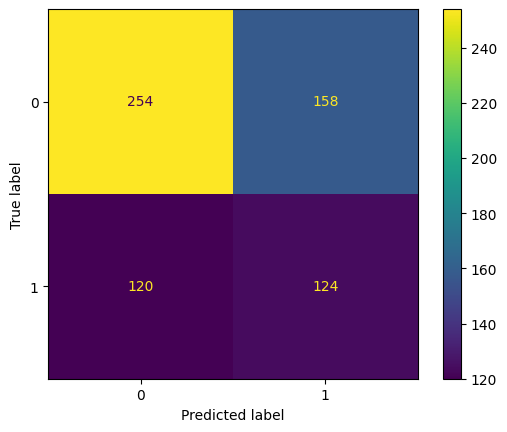

In [ ]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot()

In [ ]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=16,
    random_state=1
)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

print("Decision Tree Accuracy Score:",accuracy_score(y_test, y_predict))

Decision Tree Accuracy Score: 0.5762195121951219


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



In [ ]:
# ML 2 : logistic regression

x = df.drop(columns=["Potability"]).values
y = df.Potability.values

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
clf = lr.fit(x_train, y_train)
y_hat = clf.predict(x_test)

In [ ]:
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_hat))

print(classification_report(y_test, y_hat))

Logistic Regression Accuracy Score: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import log_loss

y_hat_p = clf.predict_proba(x_test)
print(log_loss(y_test, y_hat_p))

0.6611222324655042


In [ ]:
# ML 3 : XGB Classifier

x_train.shape, x_test.shape

(torch.Size([2620, 9]), torch.Size([656, 9]))

In [ ]:
x_train = pd.DataFrame(x_train)
imputable_cols = [var for var in x_train.columns if x_train[var].isnull().sum() > 0]
imputable_cols

[]

In [ ]:
def plot_distribution(column):

    sns.displot(dataset[column], kde = True, alpha = 0.1, bins = 30)

    plt.xlabel(column, size = 14)
    plt.ylabel('count', size = 14)

    plt.axvline(x = dataset[column].mean(), color = 'black', ls = '--', lw = 2.5, label = 'mean')
    plt.axvline(x = dataset[column].median(), color = 'blue', label = 'median')

    plt.legend()

    plt.plot()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('model', XGBClassifier())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_pred = pipeline.predict(x_test).ravel()
y_test = y_test.ravel()
print(y_pred[:10])
print(y_test[:10])

[0 0 0 1 0 0 1 1 1 0]
tensor([0, 1, 0, 0, 1, 1, 0, 0, 0, 0])


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       412
           1       0.54      0.45      0.49       244

    accuracy                           0.65       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.65      0.65       656



<Axes: >

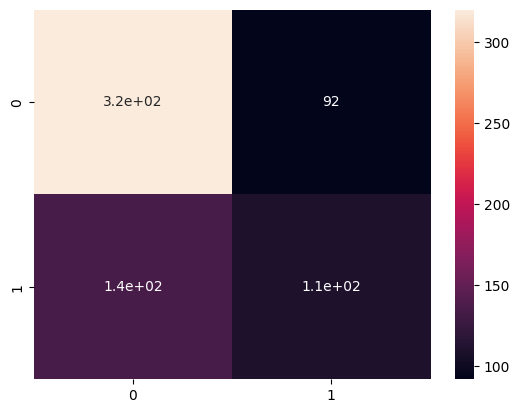

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [ ]:
print("XGB Classifier Accuracy Score", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

XGB Classifier Accuracy Score 0.6539634146341463
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       412
           1       0.54      0.45      0.49       244

    accuracy                           0.65       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.65      0.65       656



In [ ]:
import pickle as pkl

with open('pipeline.pkl', 'wb') as f:
    pkl.dump(pipeline, f)